# Lab 6
## Melissa Tobias

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [1]:
import random

class Card:
    suits=['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks=['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank=rank
        self.suit=suit
    
    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks=num_decks
        self.cards=self._generate_deck()
        self.plastic_card_position=random.randint(20, len(self.cards)-20)  #randomly places plastic card
        self.shuffle()
    
    def _generate_deck(self):
        deck=[Card(rank, suit) for _ in range(self.num_decks) for suit in Card.suits for rank in Card.ranks]
        return deck
    
    def shuffle(self):
        random.shuffle(self.cards)
    
    def draw_card(self):
        if len(self.cards)==0:
            self.reset_deck()
        
        drawn_card=self.cards.pop()
        
        #if the plastic card is found it will reshuffle
        if len(self.cards)==self.plastic_card_position:
            print("Plastic card reached, deck will be reshuffled.")
            self.reset_deck()
        return drawn_card
    
    def reset_deck(self):
        print("Shuffling the deck")
        self.cards=self._generate_deck()
        self.shuffle()
        self.plastic_card_position=random.randint(20, len(self.cards)-20)

2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [2]:
class Card:
    suits=['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks=['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank=rank
        self.suit=suit
    
    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks=num_decks
        self.cards=[]
        self.plastic_card_position=0

class Hand:
    def __init__(self):
        self.cards=[]

class Player:
    def __init__(self, name, chips, strategy):
        self.name=name
        self.chips=chips
        self.hand=Hand()
        self.strategy=strategy

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer", chips=0, strategy="Dealer rules")

class Game:
    def __init(self, num_players, num_decks=6):
        self.players=[]
        self.dealer=Dealer()
        self.deck=Deck(num_decks)

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [3]:
class Card:
    suits=['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks=['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank=rank
        self.suit=suit
    
    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks=num_decks
        self.cards=self._generate_deck()
        self.plastic_card_position=random.randint(20, len(self.cards)-20)
        self.shuffle()

    def _generate_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.suits for rank in Card.ranks]

    def shuffle(self):
        random.shuffle(self.cards)

    def dear_card(self):
        if len(self.cards)==0:
            self.reset_deck()
        drawn_card=self.cards.pop()
        if len(self.cards)==self.plastic_card_position:
            print("Plastic card reached, deck will be reshuffled.")
            self.reset_deck()
        return drawn_card

    def reset_deck(self):
        print("Shuffling the deck")
        se;f.cards=self._generate_deck()
        self.shuffle()
        self.plastic_card_position=random.randint(20, len(self.cards)-20)

class Hand:
    def __init__(self):
        self.cards=[]

    def add_card(self, card):
        self.cards.append(card)

    def get_value(self):
        value, aces=0, 0
        for card in self.cards:
            if card.rank in 'JQK':
                value+=10
            elif card.rank=='A':
                value +=11
                value+=1
            else:
                value+=int(card, rank)
        while value>21 and aces:
            value-=10
            aces-=1
        return value

    def is_blackjack(self):
        return len(self.cards)==2 and self.get_value()==21

    def is_bust(self):
        return self.get_value()>21

class Player:
    def __init__(self, name, chips, strategy):
        self.name=name
        self.chips=chips
        self.hand=Hand()
        self.strategy=strategy

    def place_bet(self):
        return min(10, self.chips)

    def hit(self, deck):
        self.hand.add_card(deck.draw_card())

    def double_down(self, deck):
        if self.chips>=10:
            self.chips-=10
            self.hand.add_card(deck.draw_card())

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer", chips=0, strategy="Dealer rules")

    def must_hit(self):
        return self.hand.get_value()<17

    def must_stand(self):
        return self.hand.get_value()>=17

class Game:
    def __init(self, num_players, num_decks=6):
        self.players=[Player(f"Player {i+1}", 100, "Basic") for i in range(num_players)]
        self.dealer=Dealer()
        self.deck=Deck(num_decks)

    def start_game(self):
        self.deal_initial_cards()
        self.play_round()
        self.determine_winner()

    def deal_initial_cards(self):
        for _ in range(2):
            for player in self.players:
                player.hit(self.deck)
            self.dealer.hit(self.deck)

    def play_round(self):
        for player in self.players:
            while player.hand.get_value()<17:
                player.hit(self.deck)
        while self.dealer.must_hit():
            self.dealer.hit(self.deck)

    def determine_winner(self):
        dealer_value=self.dealer.hand.get_value()
        print(f"Dealer's hand: {self.dealer.hand.cards} ({dealer_value})")
        for player in self.player:
            player_value=player.hand.get_value()
            print(f"{player.name}'s hand: {player.hand.cards} ({player_value})")
            if player.hand.is_bust():
                print(f"{player.name} busts! Dealer wins.")
            elif dealer_value>21 or player_value>dealer_value:
                print(f"{player.name} wins!")
            elif player_value==dealer_value:
                print(f"{player.name} pushes.")
            else:
                print(f"{player.name} loses.")

5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [4]:
class Card:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank=rank
        self.suit=suit
    
    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks=num_decks
        self.cards=self._generate_deck()
        self.plastic_card_position=random.randint(20, len(self.cards)-20)
        self.shuffle()
    
    def _generate_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.suits for rank in Card.ranks]
    
    def shuffle(self):
        random.shuffle(self.cards)
    
    def draw_card(self):
        if len(self.cards)==0:
            self.reset_deck()
        drawn_card=self.cards.pop()
        if len(self.cards)==self.plastic_card_position:
            print("Plastic card reached, deck will be reshuffled.")
            self.reset_deck()
        return drawn_card
    
    def reset_deck(self):
        print("Shuffling the deck")
        self.cards=self._generate_deck()
        self.shuffle()
        self.plastic_card_position=random.randint(20, len(self.cards)-20)

class Hand:
    def __init__(self):
        self.cards=[]
    
    def add_card(self, card):
        self.cards.append(card)
    
    def get_value(self):
        value, aces=0, 0
        for card in self.cards:
            if card.rank in ['J', 'Q', 'K']:
                value+=10
            elif card.rank=='A':
                value+=11
                aces+=1
            else:
                value+=int(card.rank)
        while value>21 and aces:
            value-=10
            aces-=1
        return value
    
    def is_blackjack(self):
        return len(self.cards)==2 and self.get_value()==21
    
    def is_bust(self):
        return self.get_value()>21

class Player:
    def __init__(self, name, chips=100, strategy="Basic"):
        self.name=name
        self.chips=chips
        self.hand=Hand()
        self.strategy=strategy
    
    def place_bet(self):
        return min(10, self.chips)
    
    def hit(self, deck):
        self.hand.add_card(deck.draw_card())
    
    def double_down(self, deck):
        if self.chips>=10:
            self.chips-=10
            self.hand.add_card(deck.draw_card())

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer", chips=0, strategy="Dealer Rules")
    
    def must_hit(self):
        return self.hand.get_value()<17

class Game:
    def __init__(self, num_players=3, num_decks=6):
        self.players=[Player(f"Player {i+1}") for i in range(num_players)]
        self.dealer=Dealer()
        self.deck=Deck(num_decks)
    
    def start_game(self, rounds=1):
        for round_num in range(1, rounds+1):
            print(f"\n--- Round {round_num} ---")
            self.deal_initial_cards()
            self.play_round()
            self.determine_winner()
            self.reset_hands()
    
    def deal_initial_cards(self):
        for _ in range(2):
            for player in self.players:
                player.hit(self.deck)
            self.dealer.hit(self.deck)
    
    def play_round(self):
        for player in self.players:
            while player.hand.get_value()<17:
                player.hit(self.deck)
        while self.dealer.must_hit():
            self.dealer.hit(self.deck)
    
    def determine_winner(self):
        dealer_value=self.dealer.hand.get_value()
        print(f"Dealer's hand: {self.dealer.hand.cards} ({dealer_value})")
        for player in self.players:
            player_value=player.hand.get_value()
            print(f"{player.name}'s hand: {player.hand.cards} ({player_value})")
            if player.hand.is_bust():
                print(f"{player.name} busts! Dealer wins.")
            elif dealer_value>21 or player_value>dealer_value:
                print(f"{player.name} wins!")
            elif player_value==dealer_value:
                print(f"{player.name} pushes.")
            else:
                print(f"{player.name} loses.")
    
    def reset_hands(self):
        for player in self.players:
            player.hand=Hand()
        self.dealer.hand=Hand()

game=Game(num_players=3, num_decks=6)
game.start_game(rounds=5)


--- Round 1 ---
Dealer's hand: [8 of Hearts, 5 of Diamonds, A of Diamonds, K of Spades] (24)
Player 1's hand: [5 of Spades, 6 of Hearts, 9 of Diamonds] (20)
Player 1 wins!
Player 2's hand: [Q of Hearts, J of Diamonds] (20)
Player 2 wins!
Player 3's hand: [A of Hearts, K of Spades] (21)
Player 3 wins!

--- Round 2 ---
Dealer's hand: [J of Hearts, 10 of Spades] (20)
Player 1's hand: [7 of Diamonds, 6 of Clubs, K of Diamonds] (23)
Player 1 busts! Dealer wins.
Player 2's hand: [9 of Spades, 2 of Diamonds, 7 of Hearts] (18)
Player 2 loses.
Player 3's hand: [3 of Hearts, A of Spades, 5 of Clubs] (19)
Player 3 loses.

--- Round 3 ---
Dealer's hand: [A of Spades, 9 of Hearts] (20)
Player 1's hand: [4 of Hearts, J of Diamonds, 2 of Diamonds, 8 of Diamonds] (24)
Player 1 busts! Dealer wins.
Player 2's hand: [9 of Diamonds, 2 of Spades, 3 of Spades, 5 of Hearts] (19)
Player 2 loses.
Player 3's hand: [K of Diamonds, 2 of Spades, 9 of Hearts] (21)
Player 3 wins!

--- Round 4 ---
Dealer's hand: [10

6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [5]:
class Card:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank=rank
        self.suit=suit
    
    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks=num_decks
        self.cards=self._generate_deck()
        self.plastic_card_position=random.randint(20, len(self.cards)-20)
        self.shuffle()
    
    def _generate_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.suits for rank in Card.ranks]
    
    def shuffle(self):
        random.shuffle(self.cards)
    
    def draw_card(self):
        if len(self.cards)==0:
            self.reset_deck()
        drawn_card=self.cards.pop()
        if len(self.cards)==self.plastic_card_position:
            print("Plastic card reached, deck will be reshuffled.")
            self.reset_deck()
        return drawn_card
    
    def reset_deck(self):
        print("Shuffling the deck")
        self.cards=self._generate_deck()
        self.shuffle()
        self.plastic_card_position=random.randint(20, len(self.cards)-20)

class Hand:
    def __init__(self):
        self.cards=[]
    
    def add_card(self, card):
        self.cards.append(card)
    
    def get_value(self):
        value, aces=0, 0
        for card in self.cards:
            if card.rank in ['J', 'Q', 'K']:
                value+=10
            elif card.rank=='A':
                value+=11
                aces+=1
            else:
                value+=int(card.rank)
        while value>21 and aces:
            value-=10
            aces-=1
        return value
    
    def is_blackjack(self):
        return len(self.cards)==2 and self.get_value()==21
    
    def is_bust(self):
        return self.get_value()>21

class Player:
    def __init__(self, name, chips=100, strategy="Basic"):
        self.name=name
        self.chips=chips
        self.hand=Hand()
        self.strategy=strategy
    
    def place_bet(self):
        return min(10, self.chips)
    
    def hit(self, deck):
        self.hand.add_card(deck.draw_card())
    
    def double_down(self, deck):
        if self.chips>=10:
            self.chips-=10
            self.hand.add_card(deck.draw_card())

class CountingPlayer(Player):
    def __init__(self, name, chips=100, threshold=-2):
        super().__init__(name, chips, "Card counting")
        self.running_count=0
        self.threshold=threshold

    def update_count(self, card):
        if card.rank in ['2', '3', '4', '5', '6']:
            self.running_count+=1
        elif card.rank in ['10', 'J', 'Q', 'K', 'A']:
            self.running_count-=1

    def hit(self, deck):
        card=deck.draw_card()
        self.hand.add_card(card)
        self.update_count(card)

    def should_hit(self):
        return self.running_count<self.threshold

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer", chips=0, strategy="Dealer Rules")
    
    def must_hit(self):
        return self.hand.get_value()<17

class Game:
    def __init__(self, num_players=3, num_decks=6):
        self.players=[Player(f"Player {i+1}") for i in range(num_players)]
        self.dealer=Dealer()
        self.deck=Deck(num_decks)
    
    def start_game(self, rounds=1):
        for round_num in range(1, rounds+1):
            print(f"\n--- Round {round_num} ---")
            self.deal_initial_cards()
            self.play_round()
            self.determine_winner()
            self.reset_hands()
    
    def deal_initial_cards(self):
        for _ in range(2):
            for player in self.players:
                player.hit(self.deck)
            self.dealer.hit(self.deck)
    
    def play_round(self):
        for player in self.players:
            while player.hand.get_value()<17:
                player.hit(self.deck)
        while self.dealer.must_hit():
            self.dealer.hit(self.deck)
    
    def determine_winner(self):
        dealer_value=self.dealer.hand.get_value()
        print(f"Dealer's hand: {self.dealer.hand.cards} ({dealer_value})")
        for player in self.players:
            player_value=player.hand.get_value()
            print(f"{player.name}'s hand: {player.hand.cards} ({player_value})")
            if player.hand.is_bust():
                print(f"{player.name} busts! Dealer wins.")
            elif dealer_value>21 or player_value>dealer_value:
                print(f"{player.name} wins!")
            elif player_value==dealer_value:
                print(f"{player.name} pushes.")
            else:
                print(f"{player.name} loses.")
    
    def reset_hands(self):
        for player in self.players:
            player.hand=Hand()
        self.dealer.hand=Hand()

game=Game(num_players=3, num_decks=6)
game.start_game(rounds=5)


--- Round 1 ---
Dealer's hand: [10 of Spades, 5 of Clubs, 6 of Diamonds] (21)
Player 1's hand: [10 of Diamonds, 2 of Diamonds, A of Diamonds, K of Spades] (23)
Player 1 busts! Dealer wins.
Player 2's hand: [5 of Clubs, K of Spades, J of Clubs] (25)
Player 2 busts! Dealer wins.
Player 3's hand: [Q of Spades, 5 of Diamonds, 9 of Hearts] (24)
Player 3 busts! Dealer wins.

--- Round 2 ---
Dealer's hand: [A of Diamonds, Q of Diamonds] (21)
Player 1's hand: [4 of Spades, 4 of Spades, 5 of Diamonds, 8 of Spades] (21)
Player 1 pushes.
Player 2's hand: [10 of Hearts, 8 of Hearts] (18)
Player 2 loses.
Player 3's hand: [7 of Spades, Q of Hearts] (17)
Player 3 loses.

--- Round 3 ---
Dealer's hand: [Q of Spades, Q of Diamonds] (20)
Player 1's hand: [5 of Diamonds, Q of Clubs, J of Spades] (25)
Player 1 busts! Dealer wins.
Player 2's hand: [Q of Clubs, 3 of Clubs, 2 of Hearts, Q of Spades] (25)
Player 2 busts! Dealer wins.
Player 3's hand: [3 of Clubs, 3 of Diamonds, 10 of Hearts, Q of Hearts] (26

7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [6]:
class Card:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank=rank
        self.suit=suit
    
    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks=num_decks
        self.cards=self._generate_deck()
        self.plastic_card_position=random.randint(20, len(self.cards)-20)
        self.shuffle()
    
    def _generate_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.suits for rank in Card.ranks]
    
    def shuffle(self):
        random.shuffle(self.cards)
    
    def draw_card(self):
        if len(self.cards)==0:
            self.reset_deck()
        drawn_card=self.cards.pop()
        if len(self.cards)==self.plastic_card_position:
            print("Plastic card reached, deck will be reshuffled.")
            self.reset_deck()
        return drawn_card
    
    def reset_deck(self):
        print("Shuffling the deck")
        self.cards=self._generate_deck()
        self.shuffle()
        self.plastic_card_position=random.randint(20, len(self.cards)-20)

class Hand:
    def __init__(self):
        self.cards=[]
    
    def add_card(self, card):
        self.cards.append(card)
    
    def get_value(self):
        value, aces=0, 0
        for card in self.cards:
            if card.rank in ['J', 'Q', 'K']:
                value+=10
            elif card.rank=='A':
                value+=11
                aces+=1
            else:
                value+=int(card.rank)
        while value>21 and aces:
            value-=10
            aces-=1
        return value
    
    def is_blackjack(self):
        return len(self.cards)==2 and self.get_value()==21
    
    def is_bust(self):
        return self.get_value()>21

class Player:
    def __init__(self, name, chips=100, strategy="Basic"):
        self.name=name
        self.chips=chips
        self.hand=Hand()
        self.strategy=strategy
    
    def place_bet(self):
        return min(10, self.chips)
    
    def hit(self, deck):
        self.hand.add_card(deck.draw_card())

class CountingPlayer(Player):
    def __init__(self, name, chips=100, threshold=-2):
        super().__init__(name, chips, "Card counting")
        self.running_count=0
        self.threshold=threshold

    def update_count(self, card):
        if card.rank in ['2', '3', '4', '5', '6']:
            self.running_count+=1
        elif card.rank in ['10', 'J', 'Q', 'K', 'A']:
            self.running_count-=1

    def hit(self, deck):
        card=deck.draw_card()
        self.hand.add_card(card)
        self.update_count(card)

    def should_hit(self):
        return self.running_count<self.threshold

class Game:
    def __init__(self, num_players=3, num_decks=6):
        self.players=[Player(f"Player {i+1}") for i in range(num_players)]
        self.dealer=Dealer()
        self.deck=Deck(num_decks)
    
    def start_game(self, rounds=1):
        for round_num in range(1, rounds+1):
            print(f"\n--- Round {round_num} ---")
            self.deal_initial_cards()
            self.play_round()
            self.determine_winner()
            self.reset_hands()
    
    def deal_initial_cards(self):
        for _ in range(2):
            for player in self.players:
                player.hit(self.deck)
            self.dealer.hit(self.deck)
    
    def play_round(self):
        for player in self.players:
            while player.hand.get_value()<17:
                player.hit(self.deck)
        while self.dealer.must_hit():
            self.dealer.hit(self.deck)
    
    def determine_winner(self):
        dealer_value=self.dealer.hand.get_value()
        print(f"Dealer's hand: {self.dealer.hand.cards} ({dealer_value})")
        for player in self.players:
            player_value=player.hand.get_value()
            print(f"{player.name}'s hand: {player.hand.cards} ({player_value})")
            if player.hand.is_bust():
                print(f"{player.name} busts! Dealer wins.")
            elif dealer_value>21 or player_value>dealer_value:
                print(f"{player.name} wins!")
            elif player_value==dealer_value:
                print(f"{player.name} pushes.")
            else:
                print(f"{player.name} loses.")
    
    def reset_hands(self):
        for player in self.players:
            player.hand=Hand()
        self.dealer.hand=Hand()

game=Game(num_players=3, num_decks=6)
game.start_game(rounds=5)
print(f"Final total of chips: {game.players[-1].chips}")


--- Round 1 ---
Dealer's hand: [6 of Diamonds, K of Diamonds, A of Diamonds] (17)
Player 1's hand: [Q of Diamonds, Q of Clubs] (20)
Player 1 wins!
Player 2's hand: [7 of Hearts, Q of Spades] (17)
Player 2 pushes.
Player 3's hand: [3 of Clubs, 10 of Spades, 9 of Diamonds] (22)
Player 3 busts! Dealer wins.

--- Round 2 ---
Dealer's hand: [9 of Clubs, 10 of Clubs] (19)
Player 1's hand: [6 of Diamonds, 9 of Diamonds, Q of Hearts] (25)
Player 1 busts! Dealer wins.
Player 2's hand: [4 of Spades, 10 of Spades, K of Clubs] (24)
Player 2 busts! Dealer wins.
Player 3's hand: [J of Clubs, 5 of Clubs, 2 of Spades] (17)
Player 3 loses.

--- Round 3 ---
Dealer's hand: [Q of Diamonds, 10 of Spades] (20)
Player 1's hand: [2 of Diamonds, 6 of Clubs, 6 of Clubs, Q of Diamonds] (24)
Player 1 busts! Dealer wins.
Player 2's hand: [6 of Hearts, J of Diamonds, 8 of Spades] (24)
Player 2 busts! Dealer wins.
Player 3's hand: [9 of Clubs, 5 of Hearts, 5 of Diamonds] (19)
Player 3 loses.

--- Round 4 ---
Dealer

8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


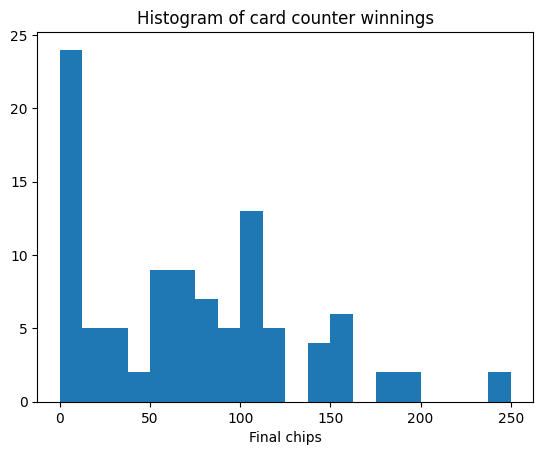

Average of winnings per round: 1.4380000000000002
Standard deviation: 58.98635435420636
Probability of winning afer 50 rounds: 0.29
Probability of losing after 50 rounds: 0.66


In [7]:
import matplotlib.pyplot as plt
import numpy as np

class Card:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank=rank
        self.suit=suit
    
    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks=num_decks
        self.cards=self._generate_deck()
        self.plastic_card_position=random.randint(20, len(self.cards)-20)
        self.shuffle()
    
    def _generate_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.suits for rank in Card.ranks]
    
    def shuffle(self):
        random.shuffle(self.cards)
    
    def draw_card(self):
        if len(self.cards)==0:
            self.reset_deck()
        drawn_card=self.cards.pop()
        if len(self.cards)==self.plastic_card_position:
            self.reset_deck()
        return drawn_card
    
    def reset_deck(self):
        self.cards=self._generate_deck()
        self.shuffle()
        self.plastic_card_position=random.randint(20, len(self.cards)-20)

class Hand:
    def __init__(self):
        self.cards=[]
    
    def add_card(self, card):
        self.cards.append(card)
    
    def get_value(self):
        value, aces=0, 0
        for card in self.cards:
            if card.rank in ['J', 'Q', 'K']:
                value+=10
            elif card.rank=='A':
                value+=11
                aces+=1
            else:
                value+=int(card.rank)
        while value>21 and aces:
            value-=10
            aces-=1
        return value
    
    def is_blackjack(self):
        return len(self.cards)==2 and self.get_value()==21
    
    def is_bust(self):
        return self.get_value()>21

class Player:
    def __init__(self, name, chips=100, strategy="Basic"):
        self.name=name
        self.chips=chips
        self.hand=Hand()
    
    def place_bet(self):
        return min(10, self.chips)
    
    def hit(self, deck):
        self.hand.add_card(deck.draw_card())

class CountingPlayer(Player):
    def __init__(self, name, chips=100, threshold=-2):
        super().__init__(name, chips)
        self.running_count=0
        self.threshold=threshold

    def update_count(self, card):
        if card.rank in ['2', '3', '4', '5', '6']:
            self.running_count+=1
        elif card.rank in ['10', 'J', 'Q', 'K', 'A']:
            self.running_count-=1

    def hit(self, deck):
        card=deck.draw_card()
        self.hand.add_card(card)
        self.update_count(card)

    def should_hit(self):
        return self.running_count<self.threshold

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer", chips=0)

    def must_hit(self):
        return self.hand.get_value()<17

class Game:
    def __init__(self, num_players=3, num_decks=6):
        self.players=[Player(f"Player {i+1}") for i in range(num_players-1)]
        self.players.append(CountingPlayer("Card counter"))
        self.dealer=Dealer()
        self.deck=Deck(num_decks)
    
    def start_game(self, rounds=1):
        for round_num in range(1, rounds+1):
            self.deal_initial_cards()
            self.play_round()
            self.determine_winner()
            self.reset_hands()
            if self.players[-1].chips<=0:
                break
    
    def deal_initial_cards(self):
        for _ in range(2):
            for player in self.players:
                player.hit(self.deck)
            self.dealer.hit(self.deck)
    
    def play_round(self):
        for player in self.players:
            if isinstance(player, CountingPlayer):
                while player.hand.get_value()<17:
                    player.hit(self.deck)
            else:
                while player.hand.get_value()<17:
                    player.hit(self.deck)
        while self.dealer.must_hit():
            self.dealer.hit(self.deck)
    
    def determine_winner(self):
        dealer_value=self.dealer.hand.get_value()
        for player in self.players:
            player_value=player.hand.get_value()
            if player.hand.is_bust():
                player.chips-=10
            elif dealer_value>21 or player_value>dealer_value:
                player.chips+=10
            elif player_value<dealer_value:
                player.chips-=10
    
    def reset_hands(self):
        for player in self.players:
            player.hand=Hand()
        self.dealer.hand=Hand()

winnings=[]
for _ in range(100):
    game=Game(num_players=4, num_decks=6)
    game.start_game(rounds=50)
    winnings.append(game.players[-1].chips)

plt.hist(winnings, bins=20)
plt.xlabel("Final chips")
plt.title("Histogram of card counter winnings")
plt.show()

avg_winnings=np.mean(winnings)
std_dev=np.std(winnings)
prob_winning=np.sum(np.array(winnings)>100)/len(winnings)
prob_losing=np.sum(np.array(winnings)<100)/len(winnings)

print(f"Average of winnings per round: {avg_winnings/50}")
print(f"Standard deviation: {std_dev}")
print(f"Probability of winning afer 50 rounds: {prob_winning}")
print(f"Probability of losing after 50 rounds: {prob_losing}")

9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

Threshold -4: Avg winnings=17.10, Std dev=37.34, Prob win=0.05
Threshold -3: Avg winnings=14.20, Std dev=32.96, Prob win=0.04
Threshold -2: Avg winnings=10.30, Std dev=23.26, Prob win=0.01
Threshold -1: Avg winnings=9.80, Std dev=23.15, Prob win=0.00


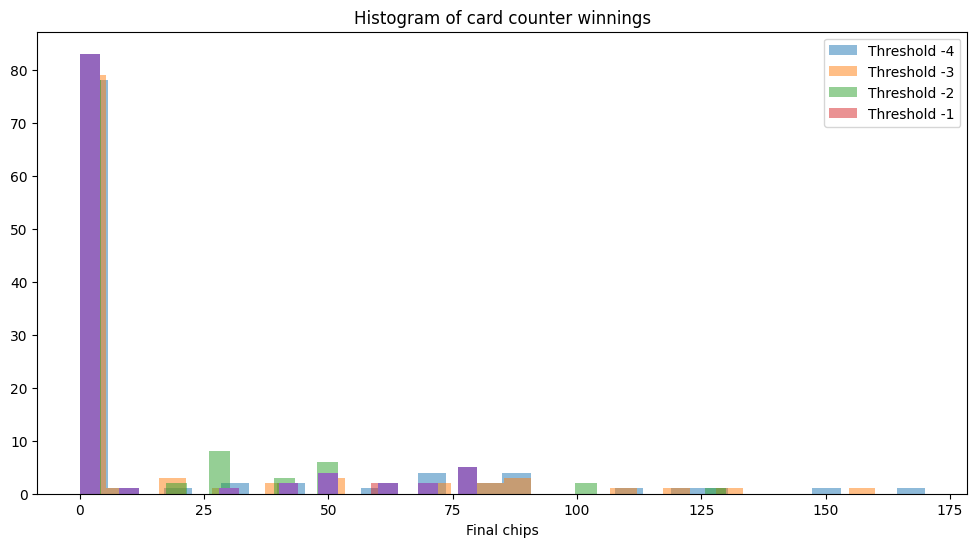

In [8]:
class Card:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank=rank
        self.suit=suit
    
    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks=num_decks
        self.cards=self._generate_deck()
        self.plastic_card_position=random.randint(20, len(self.cards)-20)
        self.shuffle()
    
    def _generate_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.suits for rank in Card.ranks]
    
    def shuffle(self):
        random.shuffle(self.cards)
    
    def draw_card(self):
        if len(self.cards)==0:
            self.reset_deck()
        drawn_card=self.cards.pop()
        if len(self.cards)==self.plastic_card_position:
            self.reset_deck()
        return drawn_card
    
    def reset_deck(self):
        self.cards=self._generate_deck()
        self.shuffle()
        self.plastic_card_position=random.randint(20, len(self.cards)-20)

class Hand:
    def __init__(self):
        self.cards=[]
    
    def add_card(self, card):
        self.cards.append(card)
    
    def get_value(self):
        value, aces=0, 0
        for card in self.cards:
            if card.rank in ['J', 'Q', 'K']:
                value+=10
            elif card.rank=='A':
                value+=11
                aces+=1
            else:
                value+=int(card.rank)
        while value>21 and aces:
            value-=10
            aces-=1
        return value
    
    def is_blackjack(self):
        return len(self.cards)==2 and self.get_value()==21
    
    def is_bust(self):
        return self.get_value()>21

class Player:
    def __init__(self, name, chips=100, strategy="Basic"):
        self.name=name
        self.chips=chips
        self.hand=Hand()
    
    def place_bet(self):
        return min(10, self.chips)
    
    def hit(self, deck):
        self.hand.add_card(deck.draw_card())

class CountingPlayer(Player):
    def __init__(self, name, chips=100, threshold=-2):
        super().__init__(name, chips)
        self.running_count=0
        self.threshold=threshold

    def update_count(self, card):
        if card.rank in ['2', '3', '4', '5', '6']:
            self.running_count+=1
        elif card.rank in ['10', 'J', 'Q', 'K', 'A']:
            self.running_count-=1

    def hit(self, deck):
        card=deck.draw_card()
        self.hand.add_card(card)
        self.update_count(card)

    def should_hit(self):
        return self.running_count<self.threshold

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer", chips=0)

    def must_hit(self):
        return self.hand.get_value()<17

class Game:
    def __init__(self, num_players=4, num_decks=6, threshold=-2):
        self.players=[Player(f"Player {i+1}") for i in range(num_players-1)]
        self.players.append(CountingPlayer("Card counter", threshold=threshold))
        self.dealer=Dealer()
        self.deck=Deck(num_decks)
    
    def start_game(self, rounds=50):
        for round_num in range(1, rounds+1):
            self.deal_initial_cards()
            self.play_round()
            self.determine_winner()
            self.reset_hands()
            if self.players[-1].chips<=0:
                break
    
    def deal_initial_cards(self):
        for _ in range(2):
            for player in self.players:
                player.hit(self.deck)
            self.dealer.hit(self.deck)
    
    def play_round(self):
        for player in self.players:
            if isinstance(player, CountingPlayer):
                while player.should_hit():
                    player.hit(self.deck)
            else:
                while player.hand.get_value()<17:
                    player.hit(self.deck)
        while self.dealer.must_hit():
            self.dealer.hit(self.deck)
    
    def determine_winner(self):
        dealer_value=self.dealer.hand.get_value()
        for player in self.players:
            player_value=player.hand.get_value()
            if player.hand.is_bust():
                player.chips-=10
            elif dealer_value>21 or player_value>dealer_value:
                player.chips+=10
            elif player_value<dealer_value:
                player.chips-=10
    
    def reset_hands(self):
        for player in self.players:
            player.hand=Hand()
        self.dealer.hand=Hand()

threshold_values=[-4, -3, -2, -1]
results={}

for threshold in threshold_values:
    winnings=[]
    for _ in range(100):
        game=Game(num_players=4, num_decks=6, threshold=threshold)
        game.start_game(rounds=50)
        winnings.append(game.players[-1].chips)
    results[threshold]=winnings

plt.figure(figsize=(12, 6))
for threshold, winnings in results.items():
    plt.hist(winnings, bins=30, alpha=0.5, label=f"Threshold {threshold}")
    avg=np.mean(winnings)
    std_dev=np.std(winnings)
    prob_win=np.sum(np.array(winnings)>100)/len(winnings)
    print(f"Threshold {threshold}: Avg winnings={avg:.2f}, Std dev={std_dev:.2f}, Prob win={prob_win:.2f}")

plt.hist(winnings, bins=20)
plt.xlabel("Final chips")
plt.legend()
plt.title("Histogram of card counter winnings")
plt.show()

10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 

Threshold -5: Avg winnings=34.70, Std Dev=46.76, Prob win=0.09
Threshold -3: Avg winnings=41.10, Std Dev=52.65, Prob win=0.15
Threshold -2: Avg winnings=36.40, Std Dev=55.13, Prob win=0.14
Threshold -1: Avg winnings=39.60, Std Dev=53.35, Prob win=0.13
Threshold 0: Avg winnings=36.60, Std Dev=43.48, Prob win=0.11


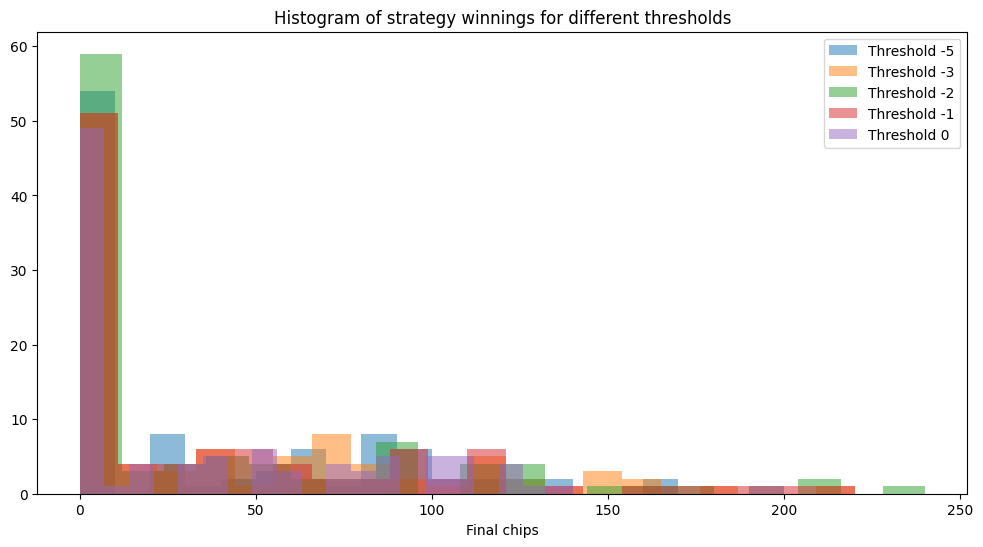

In [9]:
class Card:
    suits=['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks=['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank=rank
        self.suit=suit
    
    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks=num_decks
        self.cards=self._generate_deck()
        self.plastic_card_position=random.randint(20, len(self.cards)-20)
        self.shuffle()
    
    def _generate_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.suits for rank in Card.ranks]
    
    def shuffle(self):
        random.shuffle(self.cards)
    
    def draw_card(self):
        if len(self.cards)==0:
            self.reset_deck()
        drawn_card=self.cards.pop()
        if len(self.cards)==self.plastic_card_position:
            self.reset_deck()
        return drawn_card
    
    def reset_deck(self):
        self.cards=self._generate_deck()
        self.shuffle()
        self.plastic_card_position=random.randint(20, len(self.cards)-20)

class Hand:
    def __init__(self):
        self.cards=[]
    
    def add_card(self, card):
        self.cards.append(card)
    
    def get_value(self):
        value, aces=0, 0
        for card in self.cards:
            if card.rank in ['J', 'Q', 'K']:
                value+=10
            elif card.rank=='A':
                value+=11
                aces+=1
            else:
                value+=int(card.rank)
        while value>21 and aces:
            value-=10
            aces-=1
        return value
    
    def is_blackjack(self):
        return len(self.cards)==2 and self.get_value()==21
    
    def is_bust(self):
        return self.get_value()>21

class Player:
    def __init__(self, name, chips=100):
        self.name=name
        self.chips=chips
        self.hand=Hand()
    
    def place_bet(self):
        return min(10, self.chips)
    
    def hit(self, deck):
        self.hand.add_card(deck.draw_card())

class AdvancedCountingPlayer(Player):
    def __init__(self, name, chips=100, threshold=-2):
        super().__init__(name, chips)
        self.running_count=0
        self.threshold=threshold
    
    def update_count(self, card):
        if card.rank in ['2', '3', '4', '5', '6']:
            self.running_count+=1
        elif card.rank in ['10', 'J', 'Q', 'K', 'A']:
            self.running_count-=1
    
    def hit(self, deck):
        card=deck.draw_card()
        self.hand.add_card(card)
        self.update_count(card)
    
    def should_hit(self):
        return self.running_count<self.threshold and self.hand.get_value()<17

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer", chips=0)
    
    def must_hit(self):
        return self.hand.get_value()<17

class Game:
    def __init__(self, num_players=4, num_decks=6, threshold=-2):
        self.players=[Player(f"Player {i+1}") for i in range(num_players-1)]
        self.players.append(AdvancedCountingPlayer("Advanced counter", threshold=threshold))
        self.dealer=Dealer()
        self.deck=Deck(num_decks)
    
    def start_game(self, rounds=50):
        for round_num in range(1, rounds+1):
            self.deal_initial_cards()
            self.play_round()
            self.determine_winner()
            self.reset_hands()
            if self.players[-1].chips<=0:
                break
    
    def deal_initial_cards(self):
        for _ in range(2):
            for player in self.players:
                player.hit(self.deck)
            self.dealer.hit(self.deck)
    
    def play_round(self):
        for player in self.players:
            if isinstance(player, AdvancedCountingPlayer):
                while player.should_hit():
                    player.hit(self.deck)
            else:
                while player.hand.get_value()<17:
                    player.hit(self.deck)
        while self.dealer.must_hit():
            self.dealer.hit(self.deck)
    
    def determine_winner(self):
        dealer_value=self.dealer.hand.get_value()
        for player in self.players:
            player_value=player.hand.get_value()
            if player.hand.is_bust():
                player.chips-=10
            elif dealer_value>21 or player_value>dealer_value:
                player.chips+=10
            elif player_value<dealer_value:
                player.chips-=10
    
    def reset_hands(self):
        for player in self.players:
            player.hand=Hand()
        self.dealer.hand=Hand()

threshold_values=[-5, -3, -2, -1, 0]
results={}

for threshold in threshold_values:
    winnings=[]
    for _ in range(100):
        game=Game(num_players=4, num_decks=6, threshold=threshold)
        game.start_game(rounds=50)
        winnings.append(game.players[-1].chips)
    results[threshold]=winnings

plt.figure(figsize=(12, 6))
for threshold, winnings in results.items():
    plt.hist(winnings, bins=20, alpha=0.5, label=f"Threshold {threshold}")
    avg=np.mean(winnings)
    std_dev=np.std(winnings)
    prob_win=np.sum(np.array(winnings)>100)/len(winnings)
    print(f"Threshold {threshold}: Avg winnings={avg:.2f}, Std Dev={std_dev:.2f}, Prob win={prob_win:.2f}")

plt.xlabel("Final chips")
plt.legend()
plt.title("Histogram of strategy winnings for different thresholds")
plt.show()

## **Quiz question:**
Write a function make_deck that returns a list of all of the cards in a standard card deck. The return should be a list of tuples of pairs of suit and value. For example the 10 of Clubs would be ('Clubs', 10) and Queen of Hearts would be ('Hearts', 'Queen'). Recall that a deck has 52 cards, divided into 4 suits (Clubs, Diamonds, Hearts, and Spades), and that each suit has 13 cards: 2 to 10, Jack, Queen, King, and Ace. Summit your solution with Lab 5 or Lab 6.

In [10]:
def make_deck():
    suits=['Clubs', 'Diamonds', 'Hearts', 'Spades']
    values=[2, 3, 4, 5, 6, 7, 8, 9, 10, 'Jack', 'Queen', 'King', 'Ace']
    deck=[(suit, value) for suit in suits for value in values]
    return deck

deck=make_deck()
print(deck)

[('Clubs', 2), ('Clubs', 3), ('Clubs', 4), ('Clubs', 5), ('Clubs', 6), ('Clubs', 7), ('Clubs', 8), ('Clubs', 9), ('Clubs', 10), ('Clubs', 'Jack'), ('Clubs', 'Queen'), ('Clubs', 'King'), ('Clubs', 'Ace'), ('Diamonds', 2), ('Diamonds', 3), ('Diamonds', 4), ('Diamonds', 5), ('Diamonds', 6), ('Diamonds', 7), ('Diamonds', 8), ('Diamonds', 9), ('Diamonds', 10), ('Diamonds', 'Jack'), ('Diamonds', 'Queen'), ('Diamonds', 'King'), ('Diamonds', 'Ace'), ('Hearts', 2), ('Hearts', 3), ('Hearts', 4), ('Hearts', 5), ('Hearts', 6), ('Hearts', 7), ('Hearts', 8), ('Hearts', 9), ('Hearts', 10), ('Hearts', 'Jack'), ('Hearts', 'Queen'), ('Hearts', 'King'), ('Hearts', 'Ace'), ('Spades', 2), ('Spades', 3), ('Spades', 4), ('Spades', 5), ('Spades', 6), ('Spades', 7), ('Spades', 8), ('Spades', 9), ('Spades', 10), ('Spades', 'Jack'), ('Spades', 'Queen'), ('Spades', 'King'), ('Spades', 'Ace')]
